chi2: 0.022618
chi2: 0.004680
chi2: 0.012153
[176947 251262 394497 176458 609360 776410  94548 680533  38971 894633
 710499 492281 713010 155688 885598 329062 144998 585007 998688 702207
 102069 705728 706565 999981 999981 453592 706565 706565 512803 512803
 706565 734910   1727 185239 185239 185239 313512 313512 185239 734910
 464386 734910 165528   1727 734910 734910 734910 734910 734910 734910
 734910 734910 734910 512803 734910  26625 734910 734910 734910 828481
 734910 734910 734910 512803 828481  26625  26625 512803 799914 526290
   1727 581325 734910 734910 734910 189836 818731 526290  26625 818731
 818731 818731 818731 216397 216397 216397 216397 216397 512803  26625
  26625 512803 646645 512803 818731 734910 496335  26625 216397]


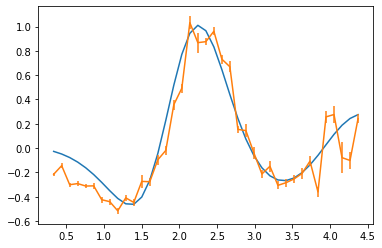

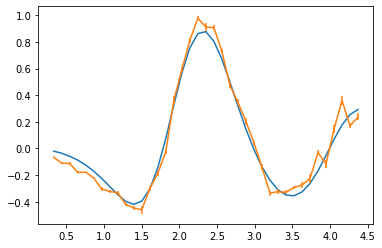

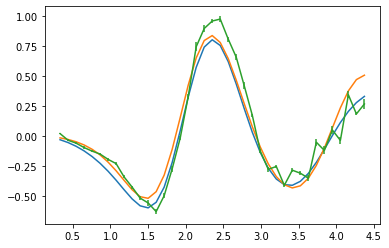

In [15]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

chi2_file = np.load('../data/chi2_1000000.npz')
chi2_array = chi2_file['chi2']
#pcd_new = chi2_file['pcd']
#a_factor = chi2_file['a_factor']
nt = 99
#for t in range(nt):
#    print(np.argmin(chi2_array[:, t]))
#    print(np.min(chi2_array[:, t]))
# load distances
#f100 = np.load('../distances_10000.npy')
#c0c1 = f100[0, 1, :]

# load IAM
f = np.load('../data/iam_arrays_1000000.npz')
q = f['q']
pcd = f['pcd']

# load experiment data
datafile = '../data/NMM_exp_dataset.mat'
mat = scipy.io.loadmat(datafile)
q_exp = np.squeeze(mat['q'])
t_exp = np.squeeze(mat['t'])
pcd_exp = mat['iso']
errors = mat['iso_stdx']

# chi2_array size(N, nt)
#plt.figure()
#plt.scatter(c0c1, 1/chi2_array[:, 50])
#plt.figure()
#plt.hist(1/chi2_array[0, :], bins=50)

factor = 0.057
time_step = 98
i = 216397
#print('a_factor: %f' % a_factor[i, time_step])
print('chi2: %f' % chi2_array[i, time_step])
#print(0.96**100)
plt.figure()
#theory = a_factor[i, time_step]*pcd[:, i]
theory = factor * pcd[:, i]
plt.plot(q, theory)
#plt.plot(q, pcd[:, i])
experiment = pcd_exp[:, time_step]
plt.errorbar(q, experiment, yerr=errors[:, time_step])
#plt.plot(q, pcd_exp[:, 95:97])
#plt.plot(q, (theory - experiment)**2)

time_step = 50
i = 734910
print('chi2: %f' % chi2_array[i, time_step])
plt.figure()
theory = factor * pcd[:, i]
plt.plot(q, theory)
experiment = pcd_exp[:, time_step]
plt.errorbar(q, experiment, yerr=errors[:, time_step])

time_step = 24
i = 999981
print('chi2: %f' % chi2_array[i, time_step])
plt.figure()
theory = factor * pcd[:, i]
plt.plot(q, theory)
theory = factor * pcd[:, 453592]
plt.plot(q, theory)
experiment = pcd_exp[:, time_step]
plt.errorbar(q, experiment, yerr=errors[:, time_step])

#print(theory)
#print(experiment)
#print(list(range(0,99)))
argmin_array = np.argmin(chi2_array[:, :], axis=0)
print(argmin_array)
#print(chi2_array[320570,:])
#print(np.argmin(chi2_array[:,0]))
#print(np.argmin(chi2_array[:,1]))

#np.save('argmin_array.npy', argmin_array)
#a = np.load('argmin_array.npy')

#print(a - argmin_array)
